# Data Overview

## stop locations

27,614 stop locations with addresses

In [1]:
import psycopg2
import pprint
import pandas as pd
import pyarrow as pa
import pyarrow.csv as csv

In [2]:
%%time
table = csv.read_csv(
    "../data/myki/full_samp_0_and_1/Samp_0/ScanOffTransaction/2018/Week26/QID3530491_20180713_14034_0.txt.gz",
    parse_options=pa.csv.ParseOptions(
        delimiter="|"
    )
)
df = table.to_pandas()
df

CPU times: user 264 ms, sys: 38.9 ms, total: 303 ms
Wall time: 141 ms


,2,2018-06-29,2018-06-29 17:30:13,22156610,4,0,,7,20037
0,2,2018-06-29,2018-06-29 18:05:22,22637430,65,0,,7,20036
1,2,2018-06-24,2018-06-24 10:42:20,22991440,1,0,,1,64404
2,2,2018-06-29,2018-06-29 11:42:31,16530230,2,0,,1,64404
3,2,2018-06-24,2018-06-24 12:18:14,24434170,2,0,,1,64404
4,2,2018-06-29,2018-06-29 11:58:12,22996730,2,0,,1,64404
...,...,...,...,...,...,...,...,...,...
505541,1,2018-06-27,2018-06-27 19:19:33,16907540,1,3300,900,33686,11560
505542,1,2018-06-26,2018-06-26 11:08:23,20981680,1,3330,900,15952,22022
505543,1,2018-06-26,2018-06-26 19:43:20,24037670,1,2618,902,33598,22403
505544,1,2018-06-28,2018-06-28 12:45:28,18166000,1,2209,Headless Mode,692,24293


In [3]:
%%time
df = pd.read_csv(
    "../data/myki/full_samp_0_and_1/Samp_0/ScanOffTransaction/2018/Week26/QID3530491_20180713_14034_0.txt.gz",
    sep="|"
)
df

CPU times: user 366 ms, sys: 31 ms, total: 397 ms
Wall time: 406 ms


,2,2018-06-29,2018-06-29 17:30:13,22156610,4,0,Unnamed: 6,7,20037
0,2,2018-06-29,2018-06-29 18:05:22,22637430,65,0,NaN,7,20036
1,2,2018-06-24,2018-06-24 10:42:20,22991440,1,0,NaN,1,64404
2,2,2018-06-29,2018-06-29 11:42:31,16530230,2,0,NaN,1,64404
3,2,2018-06-24,2018-06-24 12:18:14,24434170,2,0,NaN,1,64404
4,2,2018-06-29,2018-06-29 11:58:12,22996730,2,0,NaN,1,64404
...,...,...,...,...,...,...,...,...,...
505541,1,2018-06-27,2018-06-27 19:19:33,16907540,1,3300,900,33686,11560
505542,1,2018-06-26,2018-06-26 11:08:23,20981680,1,3330,900,15952,22022
505543,1,2018-06-26,2018-06-26 19:43:20,24037670,1,2618,902,33598,22403
505544,1,2018-06-28,2018-06-28 12:45:28,18166000,1,2209,Headless Mode,692,24293


In [4]:
%%time
df = pd.read_csv("../data/myki/stop_locations.txt.gz", sep="|")
df

CPU times: user 67.3 ms, sys: 8.14 ms, total: 75.4 ms
Wall time: 87.7 ms


,867,Weemala Court,Weemala Ct/Plenty River Dr (Greensborough),Kerbside,Greensborough,3088,Melbourne,Banyule,Greater Metro,-37.689596,145.105088
0,868,Crana Grove,Crana Gr/Plenty River Dr (Greensborough),Kerbside,Greensborough,3088.0,Melbourne,Banyule,Greater Metro,-37.686742,145.105588
1,869,Punkerri Circuit,Punkerri Cct/Plenty River Dr (Greensborough),Kerbside,Greensborough,3088.0,Melbourne,Banyule,Greater Metro,-37.683643,145.108743
2,870,Plenty River Drive,231 Plenty River Dr (Greensborough),Kerbside,Greensborough,3088.0,Melbourne,Banyule,Greater Metro,-37.682591,145.111331
3,875,Oldstead Rd,Oldstead Rd/Diamond Creek Rd (Greensborough),Kerbside,Greensborough,3088.0,Melbourne,Banyule,Greater Metro,-37.685336,145.117319
4,876,St Thomas PS,St Thomas PS/Diamond Creek Rd (Greensborough),Kerbside,Greensborough,3088.0,Melbourne,Banyule,Greater Metro,-37.682753,145.119615
...,...,...,...,...,...,...,...,...,...,...,...
27608,38038,Weighbridge,Weighbridge/Princes Hwy (Officer),Kerbside,Officer,3809.0,Melbourne,Cardinia,Greater Metro,-38.062687,145.418964
27609,38039,Starling Road,Starling Rd/Princes Hwy (Officer),Kerbside,Officer,3809.0,Melbourne,Cardinia,Greater Metro,-38.061328,145.415303
27610,38040,Officer Post Office,Officer Post Office/Princes Hwy (Officer),Kerbside,Officer,3809.0,Melbourne,Cardinia,Greater Metro,-38.060197,145.409172
27611,38041,Berwick Automotive,Berwick Automotive/Princes Hwy (Officer),Kerbside,Officer,3809.0,Melbourne,Cardinia,Greater Metro,-38.059545,145.405684


In [5]:
%%time

conn = psycopg2.connect("postgres://:@localhost:5432/ruby_pipeline_demo_development")
cursor = conn.cursor()
get_stop_locations_sql = """
    SELECT
        *
    FROM
        stop_locations;
"""
stop_df = pd.read_sql(get_stop_locations_sql, conn)
conn.close()

stop_df

CPU times: user 81.4 ms, sys: 23.4 ms, total: 105 ms
Wall time: 199 ms


,id,street,location,stop_type,suburb,postcode,city,council,areas,latitude,longitude
0,867,Weemala Court,Weemala Ct/Plenty River Dr (Greensborough),Kerbside,Greensborough,3088,Melbourne,Banyule,Greater Metro,-37.689596,145.105088
1,868,Crana Grove,Crana Gr/Plenty River Dr (Greensborough),Kerbside,Greensborough,3088,Melbourne,Banyule,Greater Metro,-37.686742,145.105588
2,869,Punkerri Circuit,Punkerri Cct/Plenty River Dr (Greensborough),Kerbside,Greensborough,3088,Melbourne,Banyule,Greater Metro,-37.683643,145.108743
3,870,Plenty River Drive,231 Plenty River Dr (Greensborough),Kerbside,Greensborough,3088,Melbourne,Banyule,Greater Metro,-37.682591,145.111331
4,875,Oldstead Rd,Oldstead Rd/Diamond Creek Rd (Greensborough),Kerbside,Greensborough,3088,Melbourne,Banyule,Greater Metro,-37.685336,145.117319
...,...,...,...,...,...,...,...,...,...,...,...
27609,38038,Weighbridge,Weighbridge/Princes Hwy (Officer),Kerbside,Officer,3809,Melbourne,Cardinia,Greater Metro,-38.062687,145.418964
27610,38039,Starling Road,Starling Rd/Princes Hwy (Officer),Kerbside,Officer,3809,Melbourne,Cardinia,Greater Metro,-38.061328,145.415303
27611,38040,Officer Post Office,Officer Post Office/Princes Hwy (Officer),Kerbside,Officer,3809,Melbourne,Cardinia,Greater Metro,-38.060197,145.409172
27612,38041,Berwick Automotive,Berwick Automotive/Princes Hwy (Officer),Kerbside,Officer,3809,Melbourne,Cardinia,Greater Metro,-38.059545,145.405684


### scans

scan ON and scan OFF events across a week of data per file

(array([ 1962.,   436.,   227.,   179.,   159.,  1657., 11195., 35740.,
        70901., 38644., 22437., 21304., 22914., 23576., 25656., 36058.,
        42086., 52398., 46147., 20910., 10537.,  8417.,  7127.,  4880.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <BarContainer object of 24 artists>)

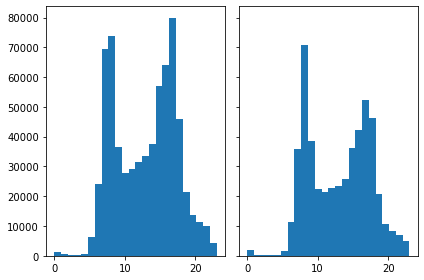

In [6]:
import matplotlib.pyplot as plt

conn = psycopg2.connect("postgres://:@localhost:5432/ruby_pipeline_demo_development")
cursor = conn.cursor()
get_scans_sql = """
    SELECT
        scan_on,
        date_time
    FROM
        scans;
"""
scan_df = pd.read_sql(get_scans_sql, conn)
conn.close()

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
hours = 24
# plt.hist(scan_df["date_time"].dt.hour, bins=hours)
axs[0].hist(scan_df.query("scan_on == True")["date_time"].dt.hour, bins=hours)
axs[1].hist(scan_df.query("scan_on == False")["date_time"].dt.hour, bins=hours)